In [28]:
# Import the models and functions
import torch
import os.path
from models import *
from trainer import *
import matplotlib.pyplot as plt
from torchinfo import summary

device = torch.device("cuda")
device

device(type='cuda')

In [29]:
%load_ext autoreload
%autoreload 2

import numpy as np

# Load in data, this assumed you have a folder in env named data
data_dir = "data"
X_test = np.load(os.path.join(data_dir, "X_test.npy"))
y_test = np.load(os.path.join(data_dir, "y_test.npy"))
person_test = np.load(os.path.join(data_dir, "person_test.npy")).squeeze(axis=1)
X_train_valid = np.load(os.path.join(data_dir, "X_train_valid.npy"))
y_train_valid = np.load(os.path.join(data_dir, "y_train_valid.npy"))
person_train_valid = np.load(os.path.join(data_dir, "person_train_valid.npy")).squeeze(axis=1)

# Predefine some useful variables and fix data a bit
n_class = len(set(y_train_valid))
n_trials = 5
min_y = min(y_train_valid)
y_train_valid = y_train_valid - min_y
y_test = y_test - min_y

# Set up data sets
X_train_valid = X_train_valid[:,:,:400]
X_test = X_test[:,:,:400]

# Make dataloader test set for the single subject
# Convert data to tensors
X_tensor = torch.FloatTensor(X_test)
y_tensor = torch.LongTensor(y_test)

# Combine X and y into a TensorDataset
dataset = TensorDataset(X_tensor, y_tensor)

# Prepare dataloaders
test_dataloader = DataLoader(dataset, batch_size=256, shuffle=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/300 [00:00<?, ?it/s]

Best valid accuracy: 0.59102


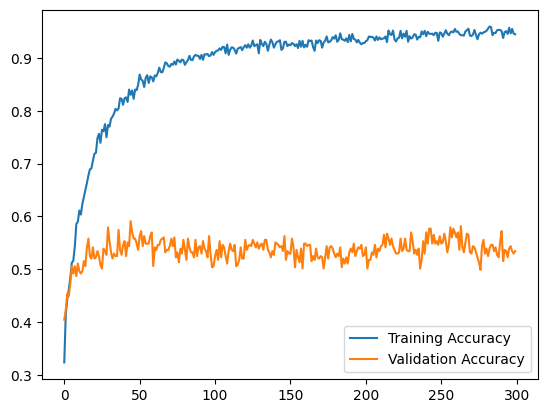

0.58014


In [86]:
num_epochs=300
test_accs = []

for i in range(1):
    cnn = TonmoyNet().to(device)
    valid_acc, trains, valids = fit(cnn, X_train_valid, y_train_valid, device, epochs=num_epochs)
    plt.figure()
    plt.plot(range(num_epochs), trains)
    plt.plot(range(num_epochs), valids)
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.show()
    test_acc, _ = evaluate(cnn, test_dataloader, device)
    test_accs.append(test_acc)

#print(test_accs)
print(np.mean(test_accs))

In [89]:
%load_ext autoreload
%autoreload 2

from models import *

# EEGNet architecture
EEGnet_summary = CNN()
summary(EEGnet_summary, input_size=(64, 22, 400))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Layer (type:depth-idx)                   Output Shape              Param #
CNN                                      [64, 4]                   --
├─Sequential: 1-1                        [64, 8, 22, 369]          --
│    └─Conv2d: 2-1                       [64, 8, 22, 369]          256
│    └─BatchNorm2d: 2-2                  [64, 8, 22, 369]          16
├─Sequential: 1-2                        [64, 16, 1, 369]          --
│    └─Conv2d: 2-3                       [64, 16, 1, 369]          352
│    └─BatchNorm2d: 2-4                  [64, 16, 1, 369]          32
│    └─ELU: 2-5                          [64, 16, 1, 369]          --
├─AvgPool2d: 1-3                         [64, 16, 1, 184]          --
├─Dropout: 1-4                           [64, 16, 1, 184]          --
├─Sequential: 1-5                        [64, 16, 1, 44]           --
│    └─Conv2d: 2-6                       [64, 16, 1, 177]          2,048
│    └─Conv2d: 2-7                       [64, 16, 1, 177]          256
│    └─Ba